In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
import sqlite3
import csv

We have a csv file, but several data at one column. It is a bad design. Lets create database with this schema:
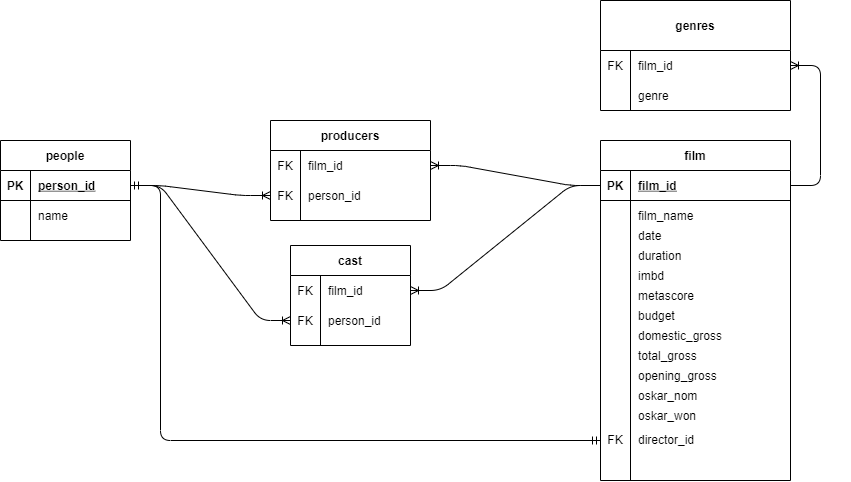

In [294]:
open('marvel.db', 'w').close()

In [295]:
con = sqlite3.connect('marvel.db')

In [296]:
cur = con.cursor()

# Create tables
cur.execute('CREATE TABLE people (person_id INTEGER, name TEXT, PRIMARY KEY(person_id))')
cur.execute('CREATE TABLE film (film_id INTEGER, film_name TEXT, date TEXT, duration TEXT, imdb REAL, metascore INTEGER, budget INTEGER, domestic_gross INTEGER, total_gross INTEGER, opening_gross INTEGER, oskar_nom INTEGER, oskar_won INTEGER, director_id INTEGER, PRIMARY KEY(film_id), FOREIGN KEY(director_id) REFERENCES people(person_id))')
cur.execute('CREATE TABLE genres (genre TEXT, film_id INTEGER, FOREIGN KEY(film_id) REFERENCES film(film_id))')
cur.execute('CREATE TABLE cast (film_id INTEGER, person_id integer, FOREIGN KEY(film_id) REFERENCES people(person_id),FOREIGN KEY(person_id) REFERENCES people(person_id))')
cur.execute('CREATE TABLE producers (film_id INTEGER, person_id integer, FOREIGN KEY(film_id) REFERENCES people(person_id),FOREIGN KEY(person_id) REFERENCES people(person_id))')

In [297]:
cheaker = {}

with open('mcu dataset.csv', "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        
        for direct in row['Director'].split(" and "):
            direct.strip()
            if direct not in cheaker:
                cur.execute("INSERT INTO people (name) VALUES(?)", [direct])
                cheaker[direct] = cur.lastrowid

            person_id = cheaker[direct]
        
        cur.execute("INSERT INTO film (film_name, date, duration,imdb, metascore, budget, domestic_gross, total_gross, opening_gross, oskar_nom, oskar_won, director_id) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", [row['Name'], row['US release Date'], row['Duration'], row['IMDB rating'], row['metascore'],row['Budget'], row['Domestic Gross'], row['Total Gross'], row['Opening Gross'], row['Oscar Nomination'],row['Oscar won'], person_id])
        film_id = cur.lastrowid
        
        for genre in row['Genre'].split(","):
            genre = genre.strip()
            cur.execute("INSERT INTO genres (film_id, genre) VALUES(?, ?)", [film_id, genre])
                


        for hum in row['Cast'].split(","):
            hum = hum.strip()
            
            if hum not in cheaker:
                cur.execute("INSERT INTO people (name) VALUES(?)", [hum])
                cheaker[hum] = cur.lastrowid
            person_id = cheaker[hum]
            cur.execute("INSERT INTO cast (film_id, person_id) VALUES(?, ?)", [film_id, person_id])
        
      
        
        for prod in row['Producer'].replace(" ," , " and ").split("and"):
            prod = prod.strip()
            
            if prod not in cheaker:
                cur.execute("INSERT INTO people (name) VALUES(?)", [prod])
                cheaker[prod] = cur.lastrowid
            person_id = cheaker[prod]
            cur.execute("INSERT INTO producers (film_id, person_id) VALUES(?, ?)", [film_id, person_id])
                   

In [302]:
#con.commit()
#con.close()

What films did Tom Holland star in?

In [299]:
for row in cur.execute('SELECT film_name FROM film WHERE film_id IN (SELECT film_id FROM cast WHERE person_id = (SELECT person_id FROM people WHERE name = "Tom Holland"))'):
    print(row)

('Spider-Man:Homecoming',)
('Spider-Man:Far From Home',)


How many films have the same director?

In [300]:
for row in cur.execute('SELECT people.name, COUNT(film.film_name) FROM film JOIN people ON people.person_id = film.director_id GROUP BY director_id'):
    print(row)

('Jon Favreau', 2)
('Louis Leterrier', 1)
('Kenneth Branagh', 1)
('Joe Jhonston', 1)
('Joss Whedon', 2)
('Shane Black', 1)
('Alan Taylor', 1)
('Joe Russo', 4)
('James Gunn', 2)
('Peyton Reed', 2)
('Scott Derrickson', 1)
('Jon Watts', 2)
('Taika Waititi', 1)
('Ryan Coogler', 1)
('Ryan Fleck', 1)
